# Advertising Sales Channel Prediction:

Submitted by Rahul Kumar BAtch No:1844.

STATEMENT: When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel

# Importing data:

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Advertising Sales Channel Prediction.csv") #reading the csv file
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
I have imported my dataset.And i can observe that my target i.e.,sales column data is a continuous type data,So it's a Regression problem.

And the Unnamed: 0 column was the index column in our raw data set, it has nothing to do in my model training so i'll drop it here itself.

SyntaxError: invalid syntax (216738703.py, line 1)

In [ ]:
#Droping Unnamed:0 column since it was the index column in raw data set.It has nothing to do with my model training.
df = df.drop(["Unnamed: 0"],axis=1)

In [ ]:
#dataframe after removing index column
df

# EDA:

In [ ]:
#Checking shape of dataset
df.shape

In [5]:
#reading all column names
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
#Checking data types of each feature
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
#Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#Checking unique values in each column
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [9]:
#Checking the number of null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no null values in my data set.But still let me check if there are any empty observations in my target column of data set.

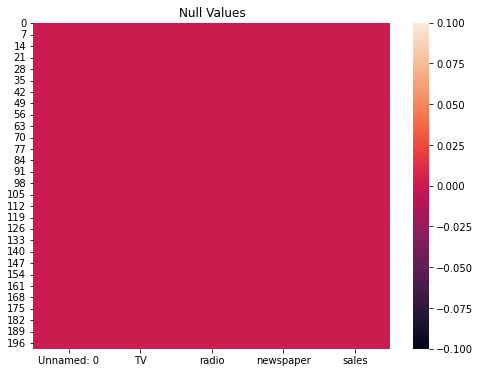

In [11]:
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can observe there are no null values in my data set.

In [13]:
#Checking unique values in target column
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

Above are the unique values of target column.

In [15]:
#Checking for any empty observation in target column
df.loc[df['sales'] == " "]

,Unnamed: 0,TV,radio,newspaper,sales


I can conclude from above output that there is no empty observations in my target variable.

In [16]:
#Checking for value count of target column
df['sales'].value_counts()


9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [17]:
#describing the data set
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


I can observe from above data description that:

All the columns count are same which means no null values.
Mean value of TV is more than means of radio and newspaper.

# Visualization:
Univariate Analysis:

<AxesSubplot:xlabel='TV', ylabel='Density'>

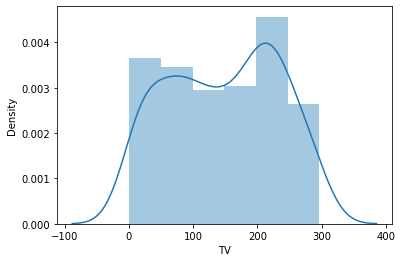

In [19]:
#distplot for TV
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

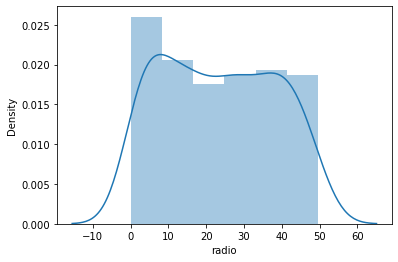

In [20]:
#distplot for radio
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

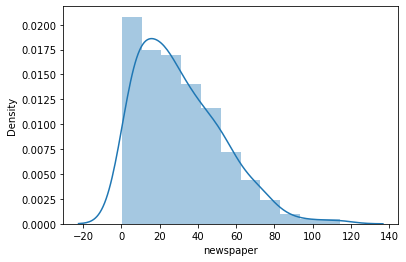

In [21]:
#distplot for newspaper
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

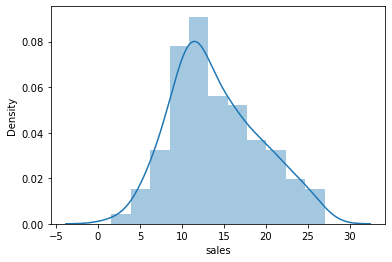

In [22]:
#distplot for sales
sns.distplot(df['sales'])

My target column sales is also almost normally distributed.

# Bivariate Analysis:

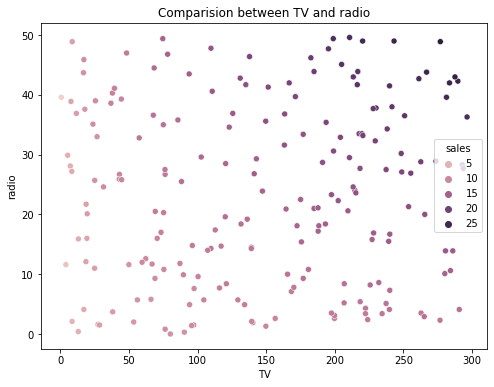

In [24]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

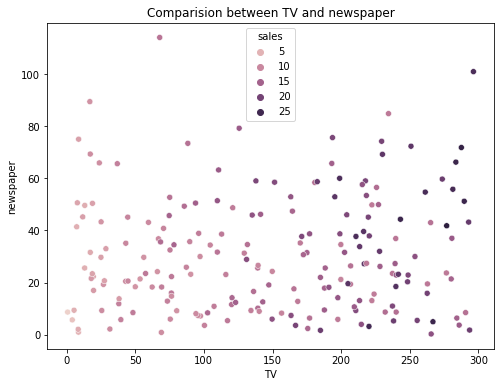

In [25]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

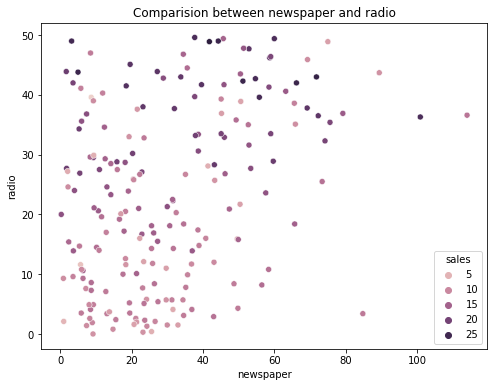

In [26]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between newspaper and radio')
sns.scatterplot(df['newspaper'],df['radio'],hue=df["sales"]);

Newspaper and radio are scattered with sales.

# Multivariate Analysis:

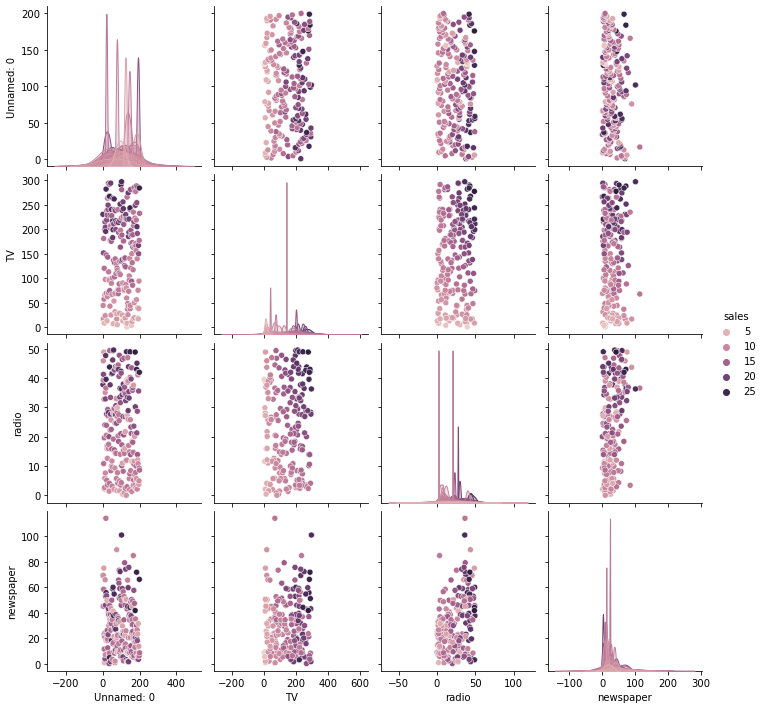

In [27]:
#pair ploting for df
sns.pairplot(df,hue="sales")

# Identifying the outliers:

<AxesSubplot:>

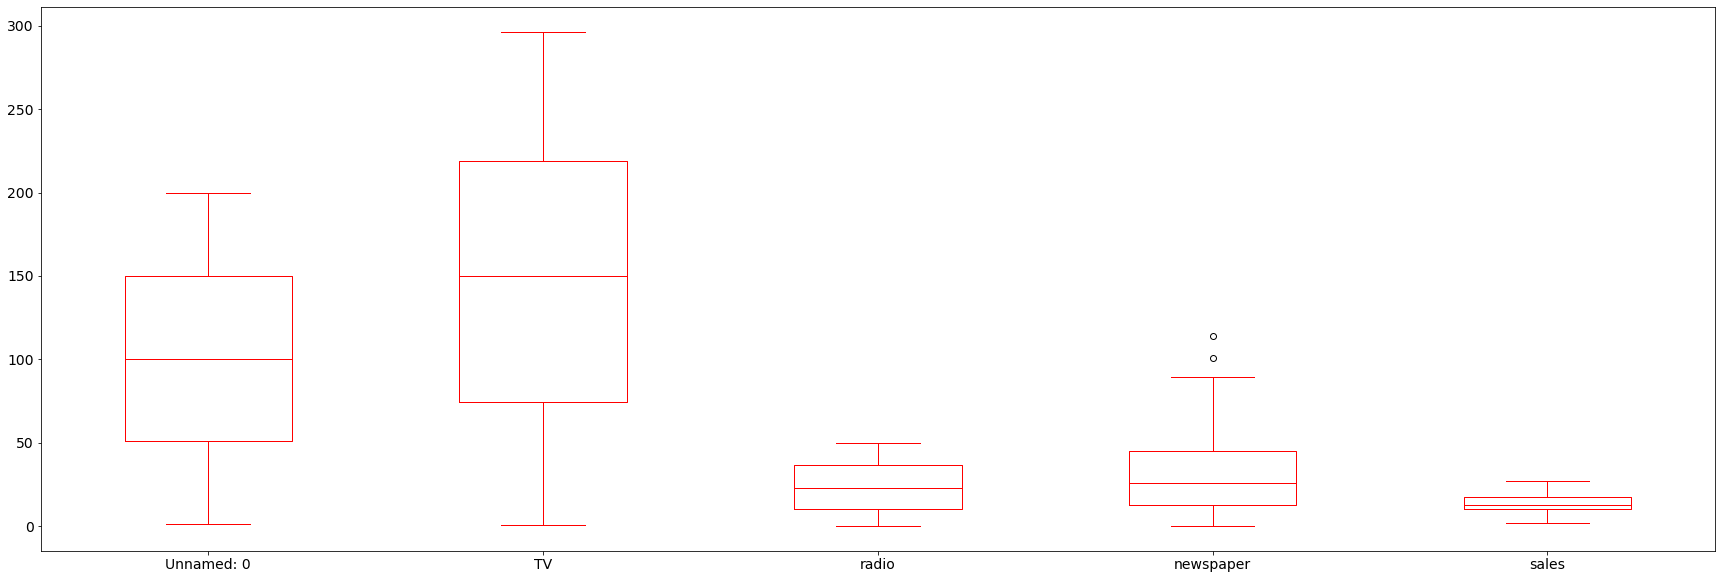

In [28]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

# Removing outliers:

# i) Zscore method:

In [29]:
dfOutliers = df[["newspaper"]]

Making a list of columns with outliers as dfOutliers.

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(dfOutliers))
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
#Checking the shape of new data
df_new.shape

(198, 5)

In [33]:
#Checking the shape of old dataset
df.shape

(200, 5)

In my old data set i was having 200 rows and 4 columns.



In [34]:
#Checking dataloss in zscore method
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

Using zscore method the dataloss after removing outliers is 1% which is less than 10%, which is good.But let me have a look into IQR method also.

# ii) IQR method:

In [35]:
Q1=dfOutliers.quantile(0.25)
Q3=dfOutliers.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Using IQR method i have removed the outliers.

In [36]:
#Checking shape of new dataset
df_1.shape

(198, 5)

After IQR method i have 198 rows and 4 columns.

In [39]:
#Checking shape of old dataset
df.shape

(200, 5)

In my old data set i was having 200 rows and 4 columns.

In [40]:
#Checking the data loss after using IQR method.
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

In IQR method also i'm getting 1% data loss.

I can either consider zscore method or IQR method since the dataloss in both the methods is same.Let me stick on to zscore itself.

# Checking for skewness:

In [41]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

# Removing skewness using yeo-johnson method:

In [43]:
fea=['newspaper']

Created a list with columns having skewness as fea.

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

I have removed the skewness using yeo-johnson.

In [46]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [47]:
#Checking skewness after removing skewness from newspaper column.
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -0.101288
sales         0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

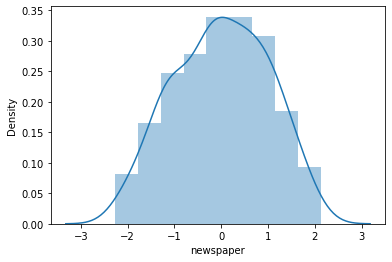

In [48]:
#distplot for newspaper
sns.distplot(df_new['newspaper'])

Correlation matrix with heat map:

In [50]:
cor=df_new.corr()

In [51]:
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.010991,-0.105193,-0.133813,-0.054703
TV,0.010991,1.000000,0.051978,0.038288,0.779121
radio,-0.105193,0.051978,1.000000,0.296570,0.576748
newspaper,-0.133813,0.038288,0.296570,1.000000,0.191387
sales,-0.054703,0.779121,0.576748,0.191387,1.000000


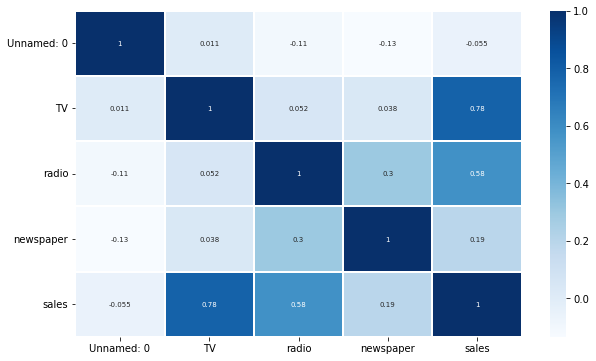

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

By looking into the heat map below are my observations.

Newspaper has less correlation with target variable.
TV and radio are very less correlated.
TV and newspaper are very less correlated.

# Visualizing correlations of the target variable using bar plot:

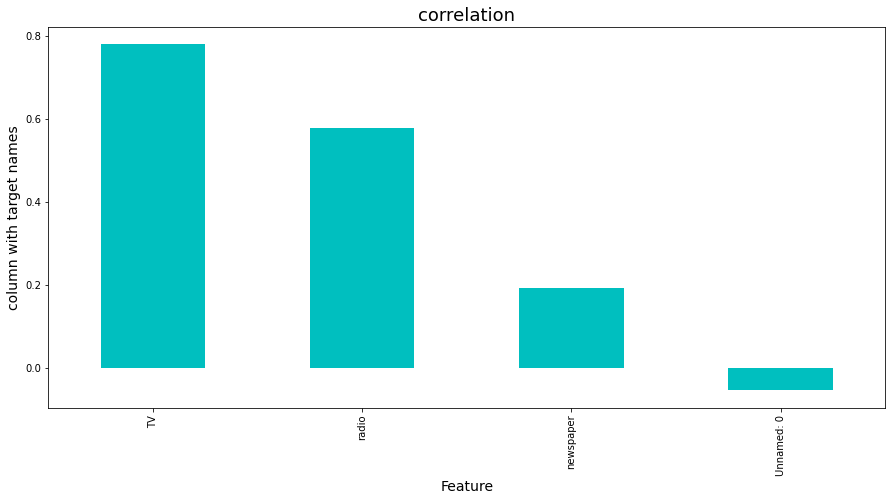

In [54]:
plt.figure(figsize=(15,7))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [55]:
#Printing final dataset after EDA part
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,1.604196,22.1
1,2,44.5,39.3,0.831044,10.4
2,3,17.2,45.9,1.607052,9.3
3,4,151.5,41.3,1.283768,18.5
4,5,180.8,10.8,1.280622,12.9
...,...,...,...,...,...
195,196,38.2,3.7,-0.687435,7.6
196,197,94.2,4.9,-1.146090,9.7
197,198,177.0,9.3,-1.314437,12.8
198,199,283.6,42.0,1.517395,25.5


# Preprocessing:

In [57]:
x = df_new.drop("sales",axis=1)
y = df_new["sales"]

# Scaling the data using MinMax scaler:

In [58]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [59]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [60]:
x

,Unnamed: 0,TV,radio,newspaper
0,0.000000,0.783202,0.762097,0.878788
1,0.005025,0.149539,0.792339,0.703678
2,0.010050,0.056333,0.925403,0.879435
3,0.015075,0.514851,0.832661,0.806215
4,0.020101,0.614886,0.217742,0.805502
...,...,...,...,...
193,0.979899,0.128030,0.074597,0.359758
194,0.984925,0.319222,0.098790,0.255878
195,0.989950,0.601912,0.187500,0.217749
196,0.994975,0.965859,0.846774,0.859129


# Finding best Random state and accuracy:

In [62]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9357505783145572  on Random_state  90


I got the best accuracy and random state.I have used r2_score as metrix.

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression algorithms:

In [65]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Linear Regression:

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))


R2_score: 0.9357505783145572


Linear Regression is giving me 93.58% r2_score.

# DecisionTreeRegressor:

In [68]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9606455226524634


# RandomForestRegressor:

In [69]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.965595041773653


RandomForestRegressor is giving me 97.13% r2_score.

# SupportVectorRegressor:

In [85]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.8985734335889555


# K-Neighbor Regressor:

In [86]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.8763368990594553


# Stochastic Gradient Descent Regressor:

In [87]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9211638143914963


# Cross Validation Score:

In [78]:
print(cross_val_score(lr,x,y,cv=5).mean())


0.8831464431044571


In [79]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.950520522233747


In [80]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9736849467166223


In [81]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8807972219576348


# Hyperparameter tunning:

In [88]:
GCV.best_params_

NameError: name 'GCV' is not defined

In [89]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=4,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

89.1077727091742


# After tuning KNN model i'm getting 94.35% as best r2_score, which is good!!!

In [91]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"AdvertisementSalesChannelPrediction.pkl")

['AdvertisementSalesChannelPrediction.pkl']

# Done: